In [1]:
import os

__author__ = 'Y H'

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import matplotlib.cm as cm
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE

import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import load_img

from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dall E Datasets
Dall_E = '/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/'

calm_dall_e = os.listdir('/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/Calm/')
nervous_dall_e = os.listdir('/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/Uncalm/')

number_files_calm_dall_e = len(calm_dall_e)
number_files_nervous_dall_e = len(nervous_dall_e)

print ('Calm ; ', number_files_calm_dall_e) #504, At the beginning
print ('Uncalm ; ', number_files_nervous_dall_e) #504 , At the beginning

Calm ;  100
Uncalm ;  100


In [11]:
input_path_dall_e = []
label_dall_e = []
Dall_E = '/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/'

for class_name in os.listdir(Dall_E):
  for path in os.listdir('/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/' + class_name):
    if class_name == 'Uncalm':
      label_dall_e.append(1)
    else:
      label_dall_e.append(0)
    input_path_dall_e.append(os.path.join('/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/', class_name, path))

print(input_path_dall_e[1], label_dall_e[1])
print(input_path_dall_e[-1], label_dall_e[-1])
#column name of the sheet
df_dalle=pd.DataFrame(list(zip(input_path_dall_e,label_dall_e )),columns=['images',"label "])
#change the file of exccl sheet
df_dalle.to_csv("//content/drive/MyDrive/Binary Classification Learn Dataset/20230601 All datasets Dall E.csv")

/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/Calm/Mountain in hot conditions with trees object in grayscale color2.jpg 0
/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/Uncalm/scary castle in rainy conditions with humans object in grayscale color7.jpg 1


In [12]:
len(input_path_dall_e) #1008 images

200

In [13]:
len(label_dall_e) #output 1008 images

200

In [14]:
print(input_path_dall_e)
print(label_dall_e)

['/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/Calm/Mountain in hot conditions with trees object in grayscale color.jpg', '/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/Calm/Mountain in hot conditions with trees object in grayscale color2.jpg', '/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/Calm/Mountain in hot conditions with trees object in grayscale color3.jpg', '/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/Calm/Mountain in hot conditions with trees object in grayscale color4.jpg', '/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/Calm/Mountain in daytime with trees object in grayscale color.jpg', '/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/Calm/Mountain in daytime with trees object in grayscale color2.jpg', '/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/Calm/Mountain in day

In [15]:
import pandas as pd
df_dall_e = pd.DataFrame()
df_dall_e['images'] = input_path_dall_e
df_dall_e['label'] = label_dall_e
df_dall_e = df_dall_e.sample(frac=1).reset_index(drop=True)
df_dall_e.tail()

,images,label
195,/content/drive/MyDrive/Binary Classification L...,1
196,/content/drive/MyDrive/Binary Classification L...,1
197,/content/drive/MyDrive/Binary Classification L...,0
198,/content/drive/MyDrive/Binary Classification L...,0
199,/content/drive/MyDrive/Binary Classification L...,1


In [16]:
import pandas as pd
df_dalle = pd.DataFrame()
df_dalle['images'] = input_path_dall_e
df_dalle['label'] = label_dall_e
df_dalle = df_dalle.sample(frac=1).reset_index(drop=True)
df_dalle.tail()

,images,label
195,/content/drive/MyDrive/Binary Classification L...,0
196,/content/drive/MyDrive/Binary Classification L...,1
197,/content/drive/MyDrive/Binary Classification L...,1
198,/content/drive/MyDrive/Binary Classification L...,1
199,/content/drive/MyDrive/Binary Classification L...,1


[Text(0, 0, '100'), Text(0, 0, '100')]

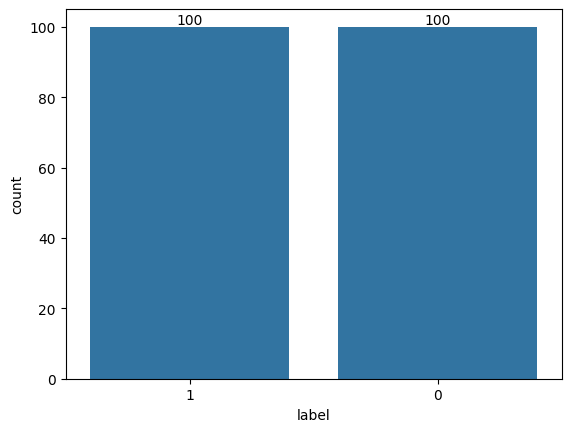

In [17]:
import seaborn as sns
ax_dall_e = sns.countplot(x=df_dall_e['label'],
                   order=df_dall_e['label'].value_counts(ascending=False).index);

abs_values_dall_e = df_dall_e['label'].value_counts(ascending=False).values

ax_dall_e.bar_label(container=ax_dall_e.containers[0], labels=abs_values_dall_e)

#Balance datasets - 511 & 511

In [18]:
df_dall_e['label'] = df_dall_e['label'].astype('str')

In [19]:
train_dall_e, test_dall_e = train_test_split(df_dall_e, test_size = 0.2, random_state = 2023)

In [20]:
train_dall_e.head()

,images,label
68,/content/drive/MyDrive/Binary Classification L...,1
80,/content/drive/MyDrive/Binary Classification L...,1
136,/content/drive/MyDrive/Binary Classification L...,0
140,/content/drive/MyDrive/Binary Classification L...,0
76,/content/drive/MyDrive/Binary Classification L...,1


In [21]:
train_dall_e.shape

(160, 2)

In [22]:
test_dall_e.shape

(40, 2)

In [23]:
test_dall_e.head()

,images,label
13,/content/drive/MyDrive/Binary Classification L...,0
188,/content/drive/MyDrive/Binary Classification L...,1
96,/content/drive/MyDrive/Binary Classification L...,0
122,/content/drive/MyDrive/Binary Classification L...,0
85,/content/drive/MyDrive/Binary Classification L...,1


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.svm import SVC
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [25]:
DATADIR = '/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/'
CATEGORIES = ['Calm','Uncalm']
IMG_SIZE=224

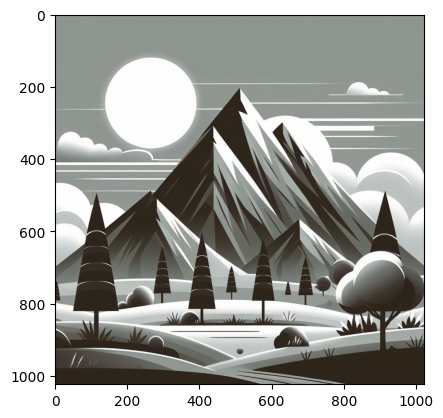

In [26]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [27]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [28]:
print(len(training_data))

200


In [29]:
lenofimage = len(training_data)

In [30]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Without Augmentation

In [31]:
image_directory = '/content/drive/MyDrive/Binary Classification Learn Dataset/Feature datasets/'
SIZE = 224
dataset = []
label = []

In [33]:
from PIL import Image
C_images = os.listdir(image_directory + 'Calm/')
for i, image_name in enumerate(C_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'Calm/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

N_images = os.listdir(image_directory + 'Uncalm/')
for i, image_name in enumerate(N_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'Uncalm/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

dataset = np.array(dataset)
label = np.array(label)

In [34]:
print(dataset.shape)
print(label.shape)

(298, 224, 224, 3)
(298,)


Label for this image is:  1


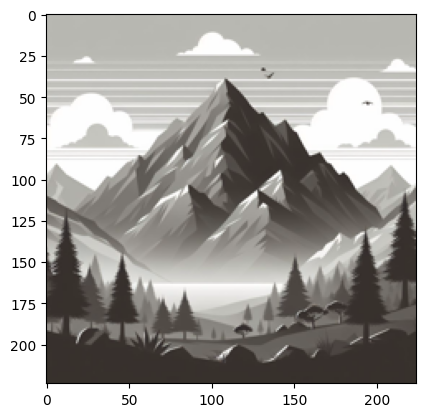

In [35]:
import random
import numpy as np
image_number = random.randint(0, len(dataset)-1)
plt.imshow(np.reshape(dataset[image_number], (224, 224, 3)))
print("Label for this image is: ", label[image_number])

In [36]:
# validation_data=(X_test,y_test),
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.2, random_state = 21)

In [37]:
X_train

array([[[[ 86,  85,  87],
         [ 83,  82,  84],
         [ 84,  83,  85],
         ...,
         [ 58,  57,  59],
         [ 43,  42,  44],
         [ 42,  41,  43]],

        [[ 88,  87,  89],
         [ 81,  80,  82],
         [ 86,  85,  87],
         ...,
         [ 44,  43,  45],
         [ 45,  44,  46],
         [ 39,  38,  40]],

        [[ 89,  88,  90],
         [ 81,  80,  82],
         [ 86,  85,  87],
         ...,
         [ 42,  41,  43],
         [ 41,  40,  42],
         [ 33,  32,  34]],

        ...,

        [[ 40,  39,  41],
         [ 40,  39,  41],
         [ 31,  30,  32],
         ...,
         [ 28,  27,  29],
         [ 27,  26,  28],
         [ 28,  27,  29]],

        [[ 43,  42,  44],
         [ 41,  40,  42],
         [ 34,  33,  35],
         ...,
         [ 53,  52,  54],
         [ 50,  49,  51],
         [ 53,  52,  54]],

        [[ 45,  44,  46],
         [ 41,  40,  42],
         [ 39,  38,  40],
         ...,
         [ 22,  21,  23],
        

In [38]:
y_train

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

In [39]:
len(X_train)

238

In [40]:
len(y_train)

238

In [41]:
len(X_test)

60

In [42]:
len(y_test)

60

In [43]:
#Normalize
X_train = X_train / 255.
X_test = X_test / 255.

In [44]:
X_train

array([[[[0.3372549 , 0.33333333, 0.34117647],
         [0.3254902 , 0.32156863, 0.32941176],
         [0.32941176, 0.3254902 , 0.33333333],
         ...,
         [0.22745098, 0.22352941, 0.23137255],
         [0.16862745, 0.16470588, 0.17254902],
         [0.16470588, 0.16078431, 0.16862745]],

        [[0.34509804, 0.34117647, 0.34901961],
         [0.31764706, 0.31372549, 0.32156863],
         [0.3372549 , 0.33333333, 0.34117647],
         ...,
         [0.17254902, 0.16862745, 0.17647059],
         [0.17647059, 0.17254902, 0.18039216],
         [0.15294118, 0.14901961, 0.15686275]],

        [[0.34901961, 0.34509804, 0.35294118],
         [0.31764706, 0.31372549, 0.32156863],
         [0.3372549 , 0.33333333, 0.34117647],
         ...,
         [0.16470588, 0.16078431, 0.16862745],
         [0.16078431, 0.15686275, 0.16470588],
         [0.12941176, 0.1254902 , 0.13333333]],

        ...,

        [[0.15686275, 0.15294118, 0.16078431],
         [0.15686275, 0.15294118, 0.16078431]

In [45]:
X_test

array([[[[0.15294118, 0.14901961, 0.15686275],
         [0.16470588, 0.16078431, 0.16862745],
         [0.16470588, 0.16078431, 0.16862745],
         ...,
         [0.1254902 , 0.12156863, 0.12941176],
         [0.13333333, 0.12941176, 0.1372549 ],
         [0.11764706, 0.11372549, 0.12156863]],

        [[0.16470588, 0.16078431, 0.16862745],
         [0.16862745, 0.16470588, 0.17254902],
         [0.17254902, 0.16862745, 0.17647059],
         ...,
         [0.12941176, 0.1254902 , 0.13333333],
         [0.14117647, 0.1372549 , 0.14509804],
         [0.1254902 , 0.12156863, 0.12941176]],

        [[0.16862745, 0.16470588, 0.17254902],
         [0.18039216, 0.17647059, 0.18431373],
         [0.17647059, 0.17254902, 0.18039216],
         ...,
         [0.1372549 , 0.13333333, 0.14117647],
         [0.14509804, 0.14117647, 0.14901961],
         [0.1254902 , 0.12156863, 0.12941176]],

        ...,

        [[0.08627451, 0.08235294, 0.09019608],
         [0.09411765, 0.09019608, 0.09803922]

# Preprocess

In [46]:
# Split data into train and validation sets
#train_set, val_set = train_test_split(train_df, test_size=0.2, random_state=42)
train_dall_e, test_dall_e = train_test_split(df_dalle, test_size = 0.2, random_state = 42)

# Define image data generator with augmentation
datagen_train = ImageDataGenerator(
    rotation_range=90,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen_val = ImageDataGenerator(
    rotation_range=90,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [47]:
# Set image input size and batch size
img_size = (224, 224)
batch_size = 16
train_dall_e['label'] = train_dall_e['label'].astype('str')
test_dall_e['label'] = test_dall_e['label'].astype('str')

# Create train and validation generators
train_gen = datagen_train.flow_from_dataframe(
    train_dall_e,
    x_col='images',
    y_col='label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42
)

Found 160 validated image filenames belonging to 2 classes.


In [48]:
val_gen = datagen_val.flow_from_dataframe(
    test_dall_e,
    x_col='images',
    y_col='label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 40 validated image filenames belonging to 2 classes.


In [49]:
labels = {
    'Calm': 0,
    'Uncalm': 1
          }

In [50]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [51]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense

SIZE = 224
INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(64, kernel_initializer = 'he_uniform'))
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(1))
cnn_model.add(Activation('sigmoid'))

In [52]:
cnn_model.compile(loss='binary_crossentropy',
              optimizer='adam',             #also try adam
              metrics=['accuracy'])

print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                   

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Define callbacks for early stopping and saving best model
callbacks = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    mode='min'
)

checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/Colab Notebooks/chekpoint CNN.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

In [54]:
history_cnn_2 = cnn_model.fit(X_train,
                         y_train,
                         batch_size = 64,
                         verbose = 1,
                         epochs = 50,
                         validation_data=(X_test,y_test),
                         callbacks = callbacks,
                         shuffle = False
                     )

Epoch 1/50
4/4 [==============================] - 34s 9s/step - loss: 1.1075 - accuracy: 0.5252 - val_loss: 0.6676 - val_accuracy: 0.5667
Epoch 2/50
4/4 [==============================] - 17s 5s/step - loss: 0.6959 - accuracy: 0.5924 - val_loss: 0.6126 - val_accuracy: 0.6333
Epoch 3/50
4/4 [==============================] - 17s 4s/step - loss: 0.5489 - accuracy: 0.7101 - val_loss: 0.5598 - val_accuracy: 0.7167
Epoch 4/50
4/4 [==============================] - 19s 5s/step - loss: 0.4739 - accuracy: 0.8193 - val_loss: 0.5158 - val_accuracy: 0.7000
Epoch 5/50
4/4 [==============================] - 19s 5s/step - loss: 0.3904 - accuracy: 0.8782 - val_loss: 0.4438 - val_accuracy: 0.8333
Epoch 6/50
4/4 [==============================] - 18s 5s/step - loss: 0.2914 - accuracy: 0.9328 - val_loss: 0.3913 - val_accuracy: 0.8667
Epoch 7/50
4/4 [==============================] - 17s 4s/step - loss: 0.2325 - accuracy: 0.9202 - val_loss: 0.3366 - val_accuracy: 0.9000
Epoch 8/50
4/4 [==================

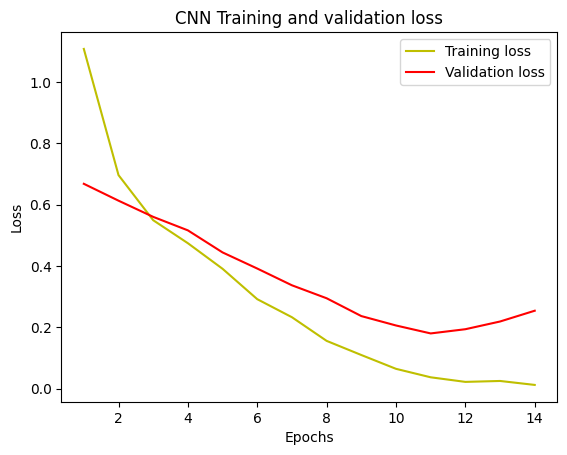

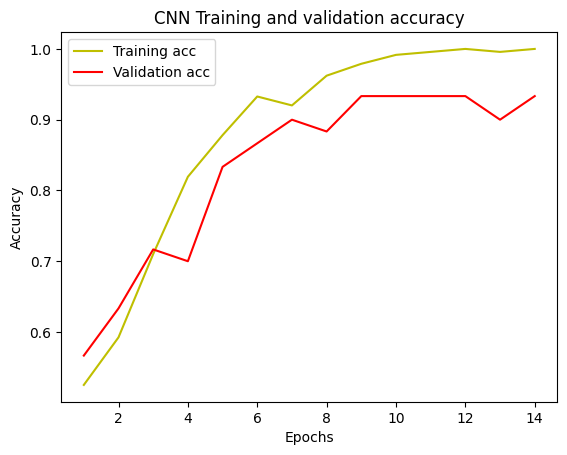

In [55]:
loss = history_cnn_2.history['loss']
val_loss = history_cnn_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history_cnn_2.history['accuracy']
val_acc = history_cnn_2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('CNN Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 132ms/step
The prediction for this image is:  [[0.25953898]]
The actual label for this image is:  1


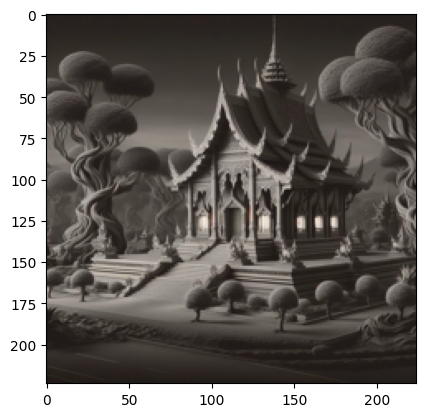

In [56]:
#Test the model on single images
n = random.randint(0, len(X_test)-1)
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", cnn_model.predict(input_img))
print("The actual label for this image is: ", y_test[n])

In [57]:
_, acc = cnn_model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

2/2 [==============================] - 1s 504ms/step - loss: 0.1797 - accuracy: 0.9333
Accuracy =  93.33333373069763 %


In [60]:
print(acc)

0.9333333373069763


In [61]:
# source = https://www.youtube.com/watch?v=hraKTseOuJA
#source 2 = https://www.youtube.com/watch?v=J1jhfAw5Uvo&t=262s